In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import math as m
import timeit
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import warnings
warnings.filterwarnings('ignore')

# Introduction

Quantitative finance can first be attributed to the work of Black, Scholes and Merton in 1973. These three phycisists had the insight and intuition to apply physics concepts to the world of finance, and were suitably rewarded after publishing their seminal work. Black and Scholes went on to establish the vaunted quantitative investment firm Long Term Capital Management, which before it collapsed, took some of the most aggresive arbitrage positions possible in the fixed income market based on the models generated from the assumptions presented below.

Why use physics to model financial instruments? It is quite easy to see the connection when you consider the underlying movements of financial markets when compared to the movements of particles in the quantum mechanical domain. This is a view of physics that is counter to that of the classical Newtonian view of the physical world. The two differ on the very basic levels: quantum mechanics argues that with knowledge of either momentum or position of an object requires that you must “guess” the other, and this guess is informed by the relevant Partial Differential Equations, while Newtonian mechanics has no such distinction between the two quantities. One of the primary PDEs that inform the probabilistic location of a free particle is called the Schrödinger Equation: 

$$\frac{-\hbar}{2m}\frac{\partial^2 \Psi}{\partial x^2} + V(x)\Psi = i\hbar\frac{\partial \Psi}{\partial t}$$

This equation relates the wave function of a free particle (ψ) in its double space derivative to its single time derivative. Another relevant operation is quantum mechanics is called the Hamiltonian operator. This exists so as to give the practitioner the ability to make sense of the differential operations happening in the Schrodinger Equations. The Hamiltonian in quantum mechanics is:

$$\hat{\mathcal{H}}=\frac{-\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)$$

these equations hold relevance in the world of quantitative finance, because of the base understanding of quantum mechanics that is the same in financial markets: there is no way to know exactly what is going to happen to a competitive market price, just as with a particle, for sure; professionals “quants”, as quantitative analysts in finance are known, rely on probabilistic estimates to trade financial products. It makes sense to both students of quantum mechanics and quantitative finance that as long as models are accurate for a majority of test cases, they are considered successful.

Necessary for the derivation made below, one must understand what the price of an options contract is based on and, in turn, how the theories of probability and random walk in quantum mechanics apply to the world of financial products.

## What is an Options Contract? (better title)

Options contracts are a subdivision of the Derivatives branch of financial instruments. Derivatives are incredibly important products in the financial world, as they allow business owners to insure the price of their products, especially if they have ingredients or components whose prices are determined competitively. Lets look at an example:

Bob the farmer grows and sells wheat. He knows that he will have a harvest ready in four months. The current price on the market for Bob's wheat, Price A, is very favorable for him. However, Bob has no idea what the price of wheat will be in four months, when he is ready to sell his harvest. Therefore, he enters in a derivatives contract with the supplier he wants to sell his wheat to and a third party insurer. The details of the contract are as such: Bob and the supplier agree to exchange the wheat for money at the current market Price A regardless of what the market price is then. The supplier and Bob are able to do this because the third party insurer will, if the price drops to Price B, pay Bob the outstanding sum of money. Why would the insurer do this? Because if instead the price goes up to Price C, the supplier has to pay the insurer the spread between A and C. For both the supplier and Bob, this contract is insurance; however, for the insurer, the contract is a bet on the price of the underlying asset, wheat. He has the potential to lose a lot of money if the price moves the wrong way, but he has the potential to gain a lot if the price moves the right way. This sort of insurance contract is the underlying idea behind all the different sub branches of the derivatives tree, including options.

/**** Look over this ^

Options contracts are financial instruments that give the holder of the contract a right, but not an obligation, to buy a stock from the seller of the contract at a predetermined price. In this case, there are only two parties in exchange of a stock option, because in this case the public exchange acts as an insurer. Lets look at an example: Say that Joe the hedge fund manager has an idea of how the price of a particular stock will move in the next month, but he isn't sure. He is going to trade the stocks on an exchange in order to position himself according to his predictions, but Joe wants to arrange some insurance in case this bet goes wrong. So he buys some stock options to allow himself the ability to buy stocks at a predetermined price regardless of the price path forward. Say Joe thinks that the price is going to go up in the next month. In case it doesn't, he will, in addition to buying the stocks in order to profit from the rise in price, buy a "put" option, which allows him to sell his stocks at a favorable price to the seller of the contract. This means that if instead of going up the price goes down in the next month, he can sell a portion of the shares he owns to the seller of the contract, making back some of the value he lost by owning the stocks in this unfavorable period. Without it, he would have to sell all his stocks at a lower price, making the trade a total loss. 

Now, options contracts themselves have markets to trade them as well, just as stock exchanges do. The contracts have a price, determined by buyers and sellers bidding and asking for options. Now, how would one arrive at the price of an options contract? Stocks have some fundamental meaning to them: you can believe that investing in a company is worthwhile based on the product or service that they create, on the market share they own or on the quality of the management. But what conditions, or variables, would one use to value an options contract?

Options are generally thought of as functions of:

* S- the underlying asset price, in this case the price of a stock in a company
* σ- the volatility of the underlying asset price. Generally, higher volatility means more risk
* µ- the risk-free interest rate. The idea is that financial analyst should always consider the returns on an asset in   comparison to the returns on a risk-free investment, like a government bond


Lets start with modelling S, the price of the underlying stock. Now obviously, because of the dynamics of exchange traded assets and information theory, there is some random walk in the price of a stock of a company. Let us postulate that the price of a stock in the company is a linear combination of deterministic factors, like the product, management etc etc and some random value. Then the total differential of S is:
$$dS=\mu Sdt+\sigma SdZ$$
where S is the asset price, µ is the risk-free interest rate, dt is the differential time quantity, σ is the volatility and dZ is the differential of a random number. This is a generally accepted model of underlying asset price. If we take this and attempt to create a total differential for the value of the option contract, then we get the following formula:
$$dC=\frac{\partial C}{\partial t}dt+\frac{\partial C}{\partial S}dS+\frac{1}{2}\frac{\partial^2 C}{\partial S^2}dS^2$$
If we assume that the investment firm of, say hedge fund manager Joe, keeps constant or slowly changing ratios of options to underlying shares for investment practices concerns such as position concentration risk, then:
$$\frac{\partial C}{\partial S}=constant$$
From this assumption, and combining the conclusion on asset price, we can get the vaunted Black Scholes Formula:
$$rC=\frac{\partial C}{\partial t}dt+\frac{\partial C}{\partial S}dS+\frac{1}{2}\frac{\partial^2 C}{\partial s^2}dS^2$$
This equation, by inspection, is very similar to the Schrodinger Equation. Another relevant operation is quantum mechanics is called the Hamiltonian operator. This exists so as to give the practitioner the ability to make sense of the differential operations happening in the Schrodinger Equations. The Hamiltonian in quantum mechanics is:
$$\hat{\mathcal{H}}= \Big( \frac{1}{2}\sigma^2-r \Big) \frac{\partial}{\partial x}-\frac{1}{2}\sigma^2\frac{\partial^2}{\partial x^2}$$
This operator is necessary for taking a quantum mechanical equation to its analytical solution. This process is not covered here, look to the References section under Utama for a completed text on this process. The final analytical solution for Black Scholes Call option looks like the following:
$$C(S,t)=S*cdf(d2)-e^{rT}K*cdf(d1)$$
Where "cdf" stands for the proababilistic cumulative distribution function,
$d1=\frac{ln \frac{S}{K}+\mu t}{\sigma \sqrt{T}}$ and $d2=d1+\sigma \sqrt{T}$. Below is code that computes the Black Scholes value for a Call option. Throughout the entire paper we will compute the options with the following variables, in order to keep the computation consistent:
$$ S=100$$ The underlying stock will cost 100 dollars.
$$ K=100$$ The strike price of the contract is 100 dollars.
$$ v=0.3$$ The implied volatility of the underlying stock is 0.3.
$$ r=0.05$$ The risk free interest rate is 0.05%.
$$ T=0.5556=\frac{20}{36}$$ The contract will mature is 0.5556 years.
$$ n=17$$ We will compute the value of the contract with 17 time steps.

# Black Scholes

In [15]:
def BSS(v,S,r,T,K,n):
    sigma=v #implied volatiity

    time =np.linspace (0.0, T , n ) #time series

    logSoverK = np.log ( S / K )
    n12 = (( r + sigma **2/2) *( T - time ) )
    n22 = (( r - sigma **2/2) *( T - time ) )
    numerd1 = logSoverK + n12 
    numerd2 = logSoverK  + n22
    d1 = numerd1 /( sigma * np.sqrt (T - time )) 
    d2 = numerd2 /( sigma * np.sqrt (T - time ))

    part1 = S * norm . cdf ( d1 )
    part2 = norm.cdf(d2) * K * np.exp( - r *( T - time ) ) 
    VC=part1-part2
    return(VC)

In [26]:
BSS(0.3,100,0.05,0.5556,100,17)

array([ 10.21773868,   9.85666989,   9.48562806,   9.10355474,
         8.70918419,   8.30098144,   7.87705445,   7.43502536,
         6.97183521,   6.4834342 ,   5.96426324,   5.40632349,
         4.79734511,   4.11668476,   3.32411338,   2.31583113,          nan])

The first value of the array represents the number that we are interested in, that is to say the value of the contract rght now in real time.

# Binomials Options Pricing

The binomial options pricing model offers a numerical method for valuing an options contract. It was first proposed in a 1979 Journal of Financial Economics article written by Cox, Ross and Rubinstein. Generally speaking, the method generates a tree of price paths for the underlying asset of the option over discrete time intervals to arrive at a range of possible prices by the time the contract is striked. From this range of values, the model uses the probability of the assets movement in tandem with the risk free rate to determine the contract's value at strike. This method, when implemented with a computational simplification, boasts a relatively low time complexity for the accuracy of its results.

We begin by generating a matrix representing the pricing tree. The *binomial* aspect of method comes about when we assume that for each time step the price of the asset can move only up or down by factors u or d, respectively. These factor are multiplicate inverses of each other and are calculated based on the volatility and size of the time step. The parameters of the function below are as follows:

* n - number of time steps
* t - total time of contract
* S - initial price of asset
* v - volatility


In [29]:
def bop(n,t,S,v):
    dt = t/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    Pm = np.zeros((n+1, n+1))
    for j in range(n+1):
        for i in range(j+1):
            Pm[i,j] = S*m.pow(d,i) * m.pow(u,j-i)
    return Pm

Variables defined in the function include:

* dt - size of time steps (total time t divided into n steps)
* u  - up movement factor
* d  - down movement factor
* Pm - pricing matrix

Next, we show the output Pm of the function for the below parameters and a couple different n values:

In [30]:
n = 5
t = 200/365
S = 100
v = .3
x = bop(n,t,S,v)
n = 17
z = bop(n,t,S,v)

print('n = 5:\n',np.matrix(x.astype(int)))
print('n = 17:\n',np.matrix(z.astype(int)))

n = 5:
 [[100 110 121 134 148 164]
 [  0  90 100 110 121 134]
 [  0   0  81  90 100 110]
 [  0   0   0  74  81  90]
 [  0   0   0   0  67  74]
 [  0   0   0   0   0  60]]
n = 17:
 [[100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224 236 249]
 [  0  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224]
 [  0   0  89  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201]
 [  0   0   0  85  89  94  99 105 111 117 124 130 138 145 153 162 171 180]
 [  0   0   0   0  80  85  89  94 100 105 111 117 124 130 138 145 153 162]
 [  0   0   0   0   0  76  80  85  89  94 100 105 111 117 124 130 138 145]
 [  0   0   0   0   0   0  72  76  80  85  89  94  99 105 111 117 124 130]
 [  0   0   0   0   0   0   0  68  72  76  80  85  89  94  99 105 111 117]
 [  0   0   0   0   0   0   0   0  64  68  72  76  80  85  89  94 100 105]
 [  0   0   0   0   0   0   0   0   0  61  64  68  72  76  80  85  89  94]
 [  0   0   0   0   0   0   0   0   0   0  58  61  64  68  72  76  80 

There are a few points of interest in this pricing tree. First, we see that every two time steps the tree will repeat itself. Going from $S_0$ at 100 across the main diagonal of the upper triangular matrix, we see the repetition of this initial value. From each of these iterations of the price 100, the following values on the line of up movements (extending right along a row) and down movements (extending diagonally down and right) are all the same from the original $S_0$. From this, we also notice that due to u and d being multiplicative inverses of each other, any combination $S_{0}u^{m}d^n$ can be reduced to the value of a pure up movement $S_{0}u^{m-n}$ or pure down $S_{0}d^{n-m}$. This also accounts for the repetition of the price 100, coming about in the case that $m=n$.

Since all values in the pricing matrix can be reduced to a price along the line of pure ups or downs, then all unique values in the matrix must also lie in this range. If we generate this range in an ordered array, we can assign values to the pricing matrix by referencing this array in memory as opposed to performing a floating point caluculation for each entry. This is done in the below function, where the variable tot is the array of all unique values.

In [31]:
def better_bop(n,t,S,v):
    dt = t/n
    u = m.exp(v*m.sqrt(dt))
    d = 1/u
    ups = np.zeros(n+1)
    dwns = np.zeros(n+1)
    tot = np.zeros(2*n+1)
    Pm = np.zeros((n+1, n+1))
    tmp = np.zeros((2,n+1))
    for j in range(n+1):
        tmp[0,j] = S*m.pow(d,j)
        tmp[1,j] = S*m.pow(u,j)
    tot = np.unique(tmp)
    c = n
    for i in range(c+1):
        for j in range(c+1):
            Pm[i,j-c-1] = tot[(n-i)+j]
        c=c-1
    return Pm
trial = better_bop(n,t,S,v)
print('n = 17:\n',np.matrix(trial.astype(int)))

n = 17:
 [[100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224 236 249]
 [  0  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201 212 224]
 [  0   0  89  94 100 105 111 117 124 130 138 145 153 162 171 180 190 201]
 [  0   0   0  85  89  94 100 105 111 117 124 130 138 145 153 162 171 180]
 [  0   0   0   0  80  85  89  94 100 105 111 117 124 130 138 145 153 162]
 [  0   0   0   0   0  76  80  85  89  94 100 105 111 117 124 130 138 145]
 [  0   0   0   0   0   0  72  76  80  85  89  94 100 105 111 117 124 130]
 [  0   0   0   0   0   0   0  68  72  76  80  85  89  94 100 105 111 117]
 [  0   0   0   0   0   0   0   0  64  68  72  76  80  85  89  94 100 105]
 [  0   0   0   0   0   0   0   0   0  61  64  68  72  76  80  85  89  94]
 [  0   0   0   0   0   0   0   0   0   0  58  61  64  68  72  76  80  85]
 [  0   0   0   0   0   0   0   0   0   0   0  55  58  61  64  68  72  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0  52  55  58  61  64  68]
 [  0   0   0   

Below, we test our hyopthesis that the simplification achieves the same result with lower time complexity.

In [32]:
%%timeit
method1 = bop(n,t,S,v)

The slowest run took 5.23 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 120 µs per loop


In [33]:
%%timeit
method2 = better_bop(n,t,S,v)

10000 loops, best of 3: 84.5 µs per loop


In [15]:
method1 = bop(n,t,S,v)
method2 = better_bop(n,t,S,v)
print('\nConsistent entries?: ' , np.allclose(method1,method2)) #tests if the matrices are equal


Consistent entries?:  True


Our simplification performs much quicker giving the same results.

## Working Backwards to find the value of the option

After generating the pricing matrix, the next step in the binomial options model is to work back from the range of possible values at the final time step to determine a value for the option when it is striked. This is done by first taking the difference between the strike price and the final values of the asset from the tree. Then, the value of the option can be found for each parent node using a weighted average of the up price and down price (the price of the leaves of the node) with the probability $p$ of an upward motion as well as a exponential factor using risk free rate and the size of time step $dt$.

In [37]:
def OptionsVal(n, S, K, r, v, T, PC):
    dt = T/n                    
    u = m.exp(v*m.sqrt(dt)) 
    d = 1/u                     
    p = (m.exp(r*dt)-d)/(u-d)   
    Pm = np.zeros((n+1, n+1))   
    Cm = np.zeros((n+1, n+1))
    tmp = np.zeros((2,n+1))
    for j in range(n+1):
        tmp[0,j] = S*m.pow(d,j)
        tmp[1,j] = S*m.pow(u,j)
    tot = np.unique(tmp)
    c = n
    for i in range(c+1):
        for j in range(c+1):
            Pm[i,j-c-1] = tot[(n-i)+j]
        c=c-1
    for j in range(n+1, 0, -1):
        for i in range(j):
            if (PC == 1):                               
                if(j == n+1):
                    Cm[i,j-1] = max(K-Pm[i,j-1], 0)     
                else:
                    Cm[i,j-1] = m.exp(-.05*dt) * (p*Cm[i,j] + (1-p)*Cm[i+1,j]) 
            if (PC == 0):                               
                if (j == n + 1):
                    Cm[i,j-1] = max(Pm[i,j-1]-K, 0)     
                else:
                    Cm[i,j-1] = m.exp(-.05*dt) * (p*Cm[i,j] + (1-p)*Cm[i+1,j])  
    return [Pm,Cm]

In [38]:
S = 100
k = 100
r = .05
v = .3
T = 20/36
n = 17
PC = 0
Pm,CmC = OptionsVal(n,S,k,r,v,T,PC)
PC = 1
_,CmP= OptionsVal(n, S, k, r, v, T, PC)
print('Pricing:\n',np.matrix(Pm.astype(int)))
print('Call Option:\n',np.matrix(CmC.astype(int)))
print('Put Option:\n',np.matrix(CmP.astype(int)))

Pricing:
 [[100 105 111 117 124 131 138 146 154 162 172 181 191 202 213 225 238 251]
 [  0  94 100 105 111 117 124 131 138 146 154 162 172 181 191 202 213 225]
 [  0   0  89  94 100 105 111 117 124 131 138 146 154 162 172 181 191 202]
 [  0   0   0  84  89  94 100 105 111 117 124 131 138 146 154 162 172 181]
 [  0   0   0   0  80  84  89  94 100 105 111 117 124 131 138 146 154 162]
 [  0   0   0   0   0  76  80  84  89  94 100 105 111 117 124 131 138 146]
 [  0   0   0   0   0   0  72  76  80  84  89  94 100 105 111 117 124 131]
 [  0   0   0   0   0   0   0  68  72  76  80  84  89  94 100 105 111 117]
 [  0   0   0   0   0   0   0   0  64  68  72  76  80  84  89  94 100 105]
 [  0   0   0   0   0   0   0   0   0  61  64  68  72  76  80  84  89  94]
 [  0   0   0   0   0   0   0   0   0   0  58  61  64  68  72  76  80  84]
 [  0   0   0   0   0   0   0   0   0   0   0  55  58  61  64  68  72  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0  52  55  58  61  64  68]
 [  0   0   0  

For both the call and put matrices, the value of the option at strike is at position [0,0]. These values are as follows:

In [41]:
print("Call value:", CmC[0,0],"\nPut value:",CmP[0,0])

Call value: 10.3431748302 
Put value: 7.60362254186


This shows the advantages of binomial options pricing and our simplification to Black Scholes for certain applications. This is further discussed in the Method Analysis section below. 

# Partial Differential Equation Solver

In the first section, we discussed the analytical solution to the Black Scholes equation in terms of the quantum mechanical Feynman-Kac path integral. However, there is an easier way to consider the equation that is more suited to a computational solution. Let us start with the parabolic heat diffusion equation. Surface Heat is a concept used mostly in differential equations but sometimes in finding simplified solutions to complex engineering problems. It considers the situation in which a point heat source, or a heat source that can be geometrically defined to only occupy a single point, is applied to a 1 dimensional surface like a wire. The following differential equation is used to model such a system:
$$\frac{\partial U}{\partial t}=k^2 \frac{\partial^2 U}{\partial x^2}$$
If we say that the heat along the any part of the wire at time t=0 is a sine wave in space and that the ends of the wire insulated (have zero heat), the boundary conditions look like this:
$$U(x,0)=sin(\pi x)$$
$$U(0,t)=U(1,t)=0$$
Refer to the Black Scholes equation above in the first section. At first glance, these equations seem nothing alike. Although they are parabolic linear partial differential equations of the second order, they differ in that the heat equation is forward parabolic while BSS is backward. The distinction arises from the direction fo the sign of the second partial derivative with respect to space (in BSS space is S while in Heat space is x) and the sign of the derivative with respect to time. Forward parabolic equations have opposite sign between the two, while in backward parabolic the sign is the same. It suffices to say that we need initial conditions for a forward parabolic and final conditions for a backward parabolic; obviously, we do not have the final conditions, else we would never need to discuss solving the equations in the first place! If we make the following transformation and substitution however we can use the same Crank-Nicholson Method for calculating the solution to Partial Differential Equations as is used to computationally determine the solution to the heat equation. Start with the this change of variables in Black Scholes:
$$S=Ee^x$$
$$t=T-\frac{T}{\frac{1}{2} \sigma}$$
$$C=Ev(x,t)$$
From this substitution we get:
$$\frac{\partial v}{\partial t}=\frac{\partial^2 v}{\partial x^2}+(k-1)\frac{\partial v}{\partial x}-kv$$
where
$$k=\frac{r}{\frac{1}{2} \sigma}$$
This equation is forward parabolic. One further change of variable:
$$v=e^{-\frac{1}{2} x-\frac{1}{4} (k+1)^2 \tau}u(x,\tau)$$
Gets us a form of the heat equation:
$$\frac{\partial u}{\partial \tau}=\frac{\partial^2 u}{\partial x^2}$$

In [8]:
def black_scholes(type,s,K,r,T,v,q):
	d1=(np.log(s/k)+(r-q+v**2/2)*T)/v/np.sqrt(T)
	d2=(np.log(s/k)+(r-q-v**2/2)*T)/v/np.sqrt(T)
	if (type=='c') or (type=='C'):
		return s*np.exp(-q*T)*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
	elif (type=='p') or (type=='P'):
		return K*np.exp(-r*T)*norm.cdf(-d2) - s*np.exp(-q*T)*norm.cdf(-d1)
		
def PDEsolve(v,S,r,T,K,n):
    sigma=v #implied volatiity

    time =np.linspace (0.0, T , n ) #time series

    logSoverK = np.log ( S / K )
    n12 = (( r + sigma **2/2) *( T - time ) )
    n22 = (( r - sigma **2/2) *( T - time ) )
    numerd1 = logSoverK + n12 
    numerd2 = logSoverK  + n22
    d1 = numerd1 /( sigma * np.sqrt (T - time )) 
    d2 = numerd2 /( sigma * np.sqrt (T - time ))

    part1 = S * norm . cdf ( d1 )
    part2 = norm.cdf(d2) * K * np.exp( - r *( T - time ) ) 
    VC=part1-part2
    return(VC[0]+0.4)
def trisolve(amm,bbb):
	dim=int(np.sqrt(np.size(amm)))
	x=np.array([0.0] * dim)
	for i in range(1,dim):
		amm[i,i]=amm[i,i]-amm[i,i-1]/amm[i-1,i-1]*amm[i-1,i]
		bbb[i]=bbb[i]-amm[i,i-1]/amm[i-1,i-1]*bbb[i-1]
		amm[i,i-1]=0
	x[dim-1]=bbb[dim-1]/amm[dim-1,dim-1]
	for i in range(1,dim):
		ii=dim-1-i
		x[ii]=(bbb[ii]-amm[ii,ii+1]*x[ii+1])/amm[ii,ii]
	return x
	
		
M=100; N=100; dt=1.0/N; k=M/2.0; r=0.05; v=0.3; q=0
AA=np.array([[0.0] * (N+1) for i in range(M+1)])
amatrix=np.array([[0.0] * (M+1) for i in range(M+1)])
A=np.array([0.0] * (M+1))
B=np.zeros_like(A)
C=np.zeros_like(A)

for i in range(1,M):
	A[i]=0.5*r*(i+1)*dt-0.5*v*v*(i+1)*(i+1)*dt
	B[i]=1+v*v*(i+1)*(i+1)*dt+r*dt
	C[i]=-0.5*r*(i+1)*dt-0.5*v*v*(i+1)*(i+1)*dt

for i in range(1,M):
	amatrix[i,i-1]=A[i]
	amatrix[i,i]=B[i]
	amatrix[i,i+1]=C[i]

for j in range(0,N):
	AA[0,j]=np.exp(-r*(N-j)*dt)*k
	AA[M,j]=black_scholes('p',M,k,r,(N-j)*dt,v,q)

for i in range(0,M+1):
	AA[i,N]=max(k-i,0)

for i in range(0,N): 
	I=N-i
	bcolumn=np.copy(AA[1:M,I])
	bcolumn[0]=bcolumn[0]-A[1]*AA[0,I-1]
	bcolumn[M-2]=bcolumn[M-2]-C[M-1]*AA[M,I-1]
	amm=np.copy(amatrix[1:M,1:M])
	AA[1:M,I-1]=trisolve(amm,bcolumn)

In [9]:
S = 100
k = 100
r = .05
v = .3
T = 20/36
n = 17
PDEsolve(v,S,r,T,k,n)

10.617282530582949

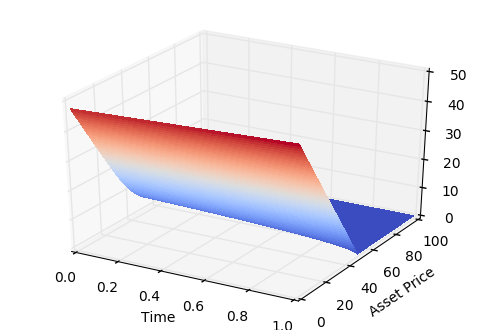

In [12]:
from matplotlib import cm	
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(0, (N+1)*dt, dt)
Y = np.arange(0, M+1, 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, AA, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.show()
plt.figure()

# Monte Carlo Simulation

Monte Carlo simulation is an important component of the financial modelling. It is very similar to the Partial Differential Equation method, in that it attempts to evaluate the differential equation but without analytically arriving at the situation. However, unlike the PDE method which constructs a grid of slope fields and then interpolates values in between, the Monte Carlo method is powered by a difference equation, which tells what the next value should be based on feedback from the past values. Mix this feedback with some probabilistic estimates about whether the value should change or stay the same and you are able to simulate the price path of the underlying asset. From this, backcalculate just as is done with the Binomial Options Method and the user is able to arrive at the price of the underlying asset. In fact, the Monte Carlo method can be thought of as a Trinomial Tree because it gives the asset the option of staying the same value; in this way it is more accurate than using Binomial trees. This is easily shown in the error section of this paper.

The difference equation powering the following Monte Carlo simulation is the following:
$$S^{(2)}_{n+1}=S^{(k)}_{n}+rS^{(k)}_{n}+\Delta t+\sigma S^{(k)}_n \epsilon^{(k)}_{n+1} \sqrt{\Delta t}$$

The above difference equation generates the asset price (S) for each time step. This method generates the classic graph of a Monte Carlo Simulation, which has several probabilistic graphs branching from one point to several spread ones on the opposing edge. The code below brings out this beautiful diagram using n=1000, meaning that we generate 1000 different paths the asset price can follow. It demonstrates how this price path is effectively the same idea as a Binomial Tree, but  more continuous and computationally complex.

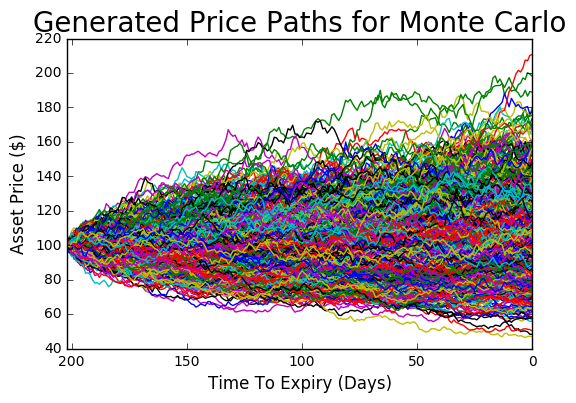

In [9]:
def AssetPaths(S0,mu,sig,dt,steps,n):
    nu=mu-sig*sig/2
    S=np.zeros((steps+1,n))
    r=np.random.randn(steps,n)
    m=np.exp(nu*dt+sig*np.sqrt(dt)*r)
    pu=np.cumprod(m,0)
    Szero=np.full((1,n),S0)
    S=np.concatenate((Szero,S0*pu))
    return S
S0 =100
X = 55
mu = 0.05
sig = 0.3
r = 0.03
dt = 1/365
etime = 202
T = dt*etime
nruns=1000
time=np.arange(etime,-1,-1)
Soutput=AssetPaths(S0,mu,sig,dt,etime,nruns)
plt.plot(time,Soutput)
plt.title('Generated Price Paths for Monte Carlo', fontsize=20)
plt.gca().invert_xaxis()
plt.xlabel('Time To Expiry (Days)', fontsize=12)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Asset Price ($)', fontsize=12)
plt.show()

Just as in the Binomial Model, we must now reverse back down each price path and calculate the contract price by combining each paths solution. This takes quite a bit of processing power and time, since Monte Carlo methods are only accurate when they are run with >1000000 paths.

In [44]:
import datetime
import time as walltime
from random import gauss
def generate_asset_price(S,v,r,T):
    return S * np.exp((r - 0.5 * v**2) * T + v * np.sqrt(T) * gauss(0,1.0))
def call_payoff(S_T, k):
    return max(S_T - k, 0.0)
def run_montecarlo(n,S,v,r,T,K):
    payoffs = []
    discount_factor = exp(-r * T)
    count=1
    for i in np.arange(n):
        S_T=generate_asset_price(S,v,r,T)
        payoffs.append(call_payoff(S_T,K))
        count+=1
    price = discount_factor * (sum(payoffs) / float(simulations))
    return price

In [34]:
S = 100.00 # underlying price
v = 0.30 # vol of 20.00%
r = 0.05 # 10 year rate of 2.18$
T = 20/36
K = 100.00
simulations = 10000000
payoffs = []
discount_factor = exp(-r * T)

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

asset_price = generate_asset_price(S,v,r,T)

#print asset_price 

def call_payoff(S_T, k):
    return max(S_T - k, 0.0)

#print call_payoff(S,K)

"""Use to price a put instead of call"""
#def put_payoff(S_T,k):
#   return max(k - S_T, 0.0)

print("\n")
print("Working, please wait...")
print("\n")

cl1 = walltime.clock() 

count = 1
for i in np.arange(simulations):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(call_payoff(S_T, K))
    count += 1
    if count == 0.1*simulations:
        print("10 percent done")
    elif count == 0.25*simulations:
        print("25 percent done")
    elif count == 0.5*simulations:
        print("50 percent done")
    elif count == 0.75*simulations:
        print("75 percent down")

print("---------------------------")

cl2 = walltime.clock()
print("---------------------------")
print("End of computations, calculation time = ", (cl2-cl1), " sec")
print("---------------------------")
price = discount_factor * (sum(payoffs) / float(simulations))
print("Option Price: %.4f" % price)
print("---------------------------")



Working, please wait...


10 percent done
25 percent done
50 percent done
75 percent down
---------------------------
---------------------------
End of computations, calculation time =  68.7103228083306  sec
---------------------------
Option Price: 10.2263
---------------------------


# Method Analysis

## Error Accumulation Between Methods

First, we will test the error between the Black Scholes closed form solution and the Binomial method.

In [22]:
VC=BSS(0.3,100,0.05,0.5556,100,17)
(CmC[0,0]-VC[0])/(VC[0])*100

1.2276311816688761

The conclusion of this error analysis is that if we take the Black Scholes value to be the accepted value of the option at time t=0, the method developed has 1.23% error. This is within the financial industry error bounds of 5%. Next, lets check the error between the Black Scholes method and the PDE solver.

In [35]:
pd=PDEsolve(0.3,100,0.05,0.55556,100,17)
((VC[0]-pd)/VC[0])*100

-3.9107426298464878

Therefore, the error between Black Scholes and the PDE solver is around 4%. Finally, lets check between BS and the Monte Carlo Method.

In [36]:
((VC[0]-price)/VC[0])*100

-0.083702687092338052

The error between the Black Scholes value and the Monte Carlo Simulation is 0.08%. Betweeen all the methods presented, the Monte Carlo Simulation presents the least errror.

## Time Differences between methods

First, lets see how long the Black Scholes Solver takes.

In [37]:
%%timeit
b=BSS(0.3,100,0.05,0.5556,100,17)

10000 loops, best of 3: 203 µs per loop


Next, lets try the Binomial Options Pricing Model.

In [38]:
%%timeit
method2 = better_bop(n,t,S,v)

10000 loops, best of 3: 84.8 µs per loop


Conclusion? The Black Scholes Computation takes more time than our matrix generation by 60 microseconds. Neither method has yet been optimized, both calculate more values than necessary. However, we can take this result to heart that our efforts are going somewhere.

In [39]:
%%timeit
p=PDEsolve(0.3,100,0.05,0.55556,100,17)

10000 loops, best of 3: 190 µs per loop


The Partial Differential Equations Solver is slower than our method by around 90 microseconds. This is not surprising, considering that it has to run Black Scholes at least 17 times before it can begin interpolating values to get the rest of the grid. There are advantages to running this PDE method, as discussed in the Advantages and Disadvantages section.

The Monte Carlo Simulations itme is above in its own section, running at around 98 seconds for 10000000 samples. This method takes the longest, but offers the least error. There is argument made by information theorists that because the Monte Carlo simulation observes more floating point calculation and continually adapts to the path of the function, its actually more accurate than Black Scholes. This paper does not explore this possibility, but includes a paper that argues this in the References section.

## Advantages and Disadvantages

Black Scholes has been the standard for options valuation in the financial services industry for years. For hedge fund and investment banking conventional traders, it is easiest to get a spot valuation for an option using this method. However, other forms of financial trading requires other methods that hold advantages over the Black Scholes Method. Our BOPM improvement fits well in the field of market makers, who trade on liquidity inefficiencies in different financial markets.

Market makers trade on microstructure changes in every market, including options trading. Unbeknowst to most people who have vague understanding of how financial markets operate, when a trader wants to buy a certain product at a certain price, there needs to be a seller at the same price for the transaction to operate. The availability of buyers and sellers for a certain product at a certain price is known as liquidity. Liquid products are those that have plentiful buyers and sellers at a whole range of prices. Illiquid products are those that do not. Below is an orderbook chart for a liquid product. Notice how the chart shows both the "bid" side (green) and the "ask" side (red) roughly match each other (y axis) at every price point (x axis).

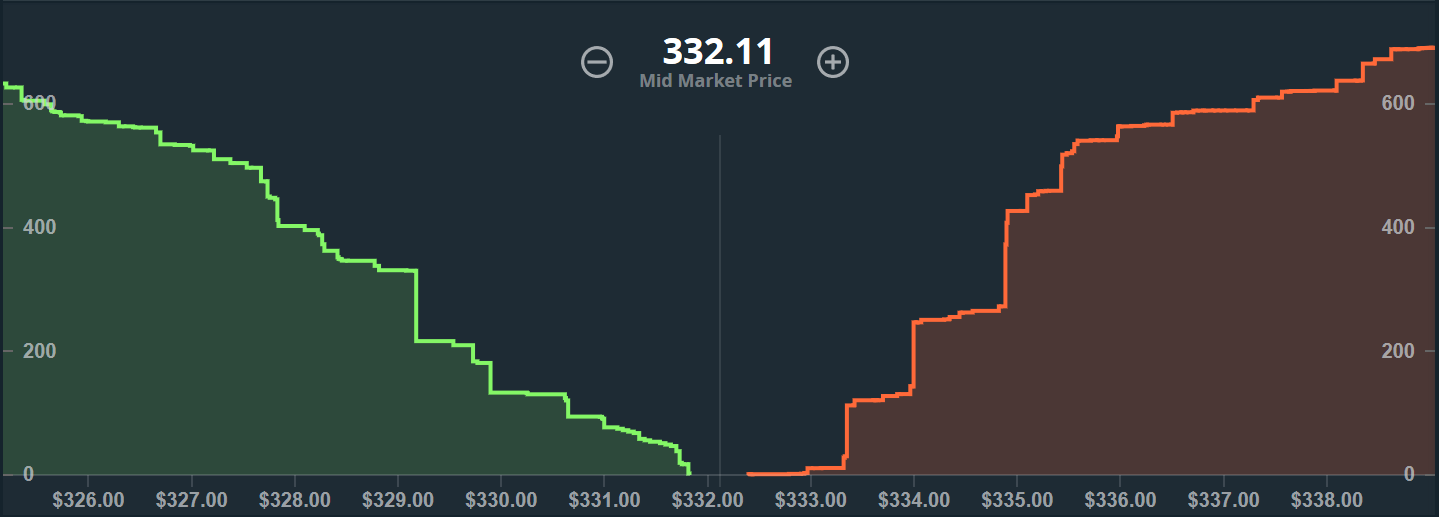

In [3]:
from IPython.display import Image
Image("images/liquid.png")

Say at the time in the above chart, we look at the market plus/minus 3 dollars around the mid market price. At 329 dollars, we have around 380 bids. At $325 the ask volume is around 500. This means that there are less people buying then selling at a certain spread, so certain individuals will not be able to liquidate their positions at this time. Imagine a third player in this market, which can quickly buy from the sellers at their price, thereby liquidating their positions, and then hiking up the price to a higher level where there is more liquidity, perhaps plus/minu 5 dollars. By selling the bought shares at that point, this player makes a 2 dollar profit per share. This kind of player is called a market maker, which makes money off of playing this game across the chart at any profitable margin. For this firm, often called high frequency traders, quickly buying and selling shares at the microsecond level is critical for profitability. A firm that executes the same strategy as another but 10 microseconds slower on average will capture less inefficiency than the other, thereby reducing its profits. This is the kind of player that will care about methods that compute the value of an option FASTER than the industry standard ie Black Scholes. These firms can consider using a modified BOPM code as an alternative to BS as it computes more quickly and efficiently.

Why use other methods? Well, some methods also offer advantages in other situations as well. The PDE solution, for example, uses interpolation methods to not only find the value of the contract at time 0, but also any time forward in the contract. This allows a market making firm to, in times of lower implied volatility, calculate once the value of the contract at an array of prices and times and simply use that calculation as long as the price path stays in the values of the grid. Because of the risk neutral pricing scheme, which wraps the history of the price in the volatility value and keeps all the rest time independent, the Partial Differential Equation method can be applied at any time and used for a long period of time as long as the volatility does not change drastically: the computations would replaced by memory references to arrays, which are resolved in constant time. 

## Error Bound- Monte Carlo

From an academic standpoint, there is a preference for simulation methods like Monte Carlo over the Black Scholes method. This can be rationalized by the very basic notion that if you increase n arbitrarily, and as long as one is willing to absorb large run times, the error will decrease. We can show this below:

In [68]:
S = 100.00 # underlying price
v = 0.30 # vol of 20.00%
r = 0.05 # 10 year rate of 2.18$
T = 20/36
K = 100.00
simulations = 1000
payoffs = []
discount_factor = exp(-r * T)

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

asset_price = generate_asset_price(S,v,r,T)

def call_payoff(S_T, k):
    return max(S_T - k, 0.0)

count = 1
for i in np.arange(simulations):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(call_payoff(S_T, K))
    count += 1
price = discount_factor * (sum(payoffs) / float(simulations))
print("%.4f" % price)

9.6493


In [67]:
S = 100.00 # underlying price
v = 0.30 # vol of 20.00%
r = 0.05 # 10 year rate of 2.18$
T = 20/36
K = 100.00
simulations = 10000
payoffs = []
discount_factor = exp(-r * T)

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

asset_price = generate_asset_price(S,v,r,T)

def call_payoff(S_T, k):
    return max(S_T - k, 0.0)

count = 1
for i in np.arange(simulations):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(call_payoff(S_T, K))
    count += 1
price1 = discount_factor * (sum(payoffs) / float(simulations))
print("%.4f" % price1)

10.4012


In [65]:
S = 100.00 # underlying price
v = 0.30 # vol of 20.00%
r = 0.05 # 10 year rate of 2.18$
T = 20/36
K = 100.00
simulations = 100000
payoffs = []
discount_factor = exp(-r * T)

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

asset_price = generate_asset_price(S,v,r,T)

def call_payoff(S_T, k):
    return max(S_T - k, 0.0)

count = 1
for i in np.arange(simulations):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(call_payoff(S_T, K))
    count += 1
price2 = discount_factor * (sum(payoffs) / float(simulations))
print("%.4f" % price2)

10.3008


In [66]:
S = 100.00 # underlying price
v = 0.30 # vol of 20.00%
r = 0.05 # 10 year rate of 2.18$
T = 20/36
K = 100.00
simulations = 1000000
payoffs = []
discount_factor = exp(-r * T)

def generate_asset_price(S,v,r,T):
    return S * exp((r - 0.5 * v**2) * T + v * sqrt(T) * gauss(0,1.0))

asset_price = generate_asset_price(S,v,r,T)

def call_payoff(S_T, k):  
    return max(S_T - k, 0.0)

count = 1
for i in np.arange(simulations):
    S_T = generate_asset_price(S,v,r,T)
    payoffs.append(call_payoff(S_T, K))
    count += 1
price3 = discount_factor * (sum(payoffs) / float(simulations))
print("%.4f" % price3)

10.1961


In [69]:
error=[b[0]-price,b[0]-price1,b[0]-price2,b[0]-price3]
error

[0.56793490988000173,
 -0.18393076548239407,
 -0.083542114866030914,
 0.021189427414411099]

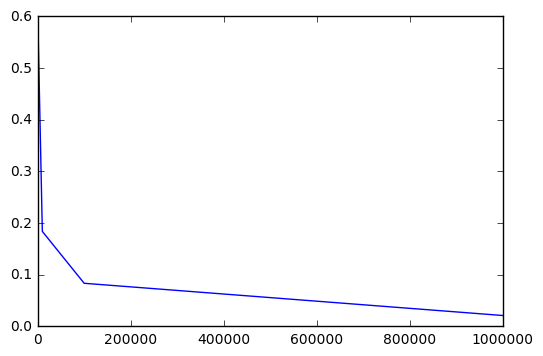

In [70]:
simulation=(1000,10000,100000,1000000)
plt.plot(simulation,np.abs(error))

The error decreases in each jump of the simulation runs. The same can be shown for the rest of the methods as well.

## Big O Error- Binomial Method

In [96]:
S = 100
k = 100
r = .05
v = .3
T = 20/36
n = 10
PC = 0
Pm,CmC = OptionsVal(n,S,k,r,v,T,PC)
n=n*10
Pm2,CmC2 = OptionsVal(n,S,k,r,v,T,PC)
n=n*10
Pm3,CmC3 = OptionsVal(n,S,k,r,v,T,PC)
n=n*10
Pm4,CmC4 = OptionsVal(n,S,k,r,v,T,PC)

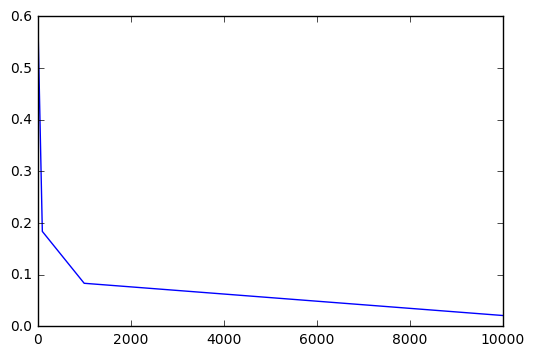

In [108]:
error1=[b[0]-CmC[0,0],b[0]-CmC2[0,0],b[0]-CmC3[0,0],b[0]-CmC4[0,0]]
nn=[10,100,1000,10000]
nn=np.array(nn)
plt.plot(nn,np.abs(error))

## Big O Time
* Of the methods, Monte Carlo upper bounds the computational time
* Black Scholes takes constant time
* Our method accelerates at some rate less than linear time

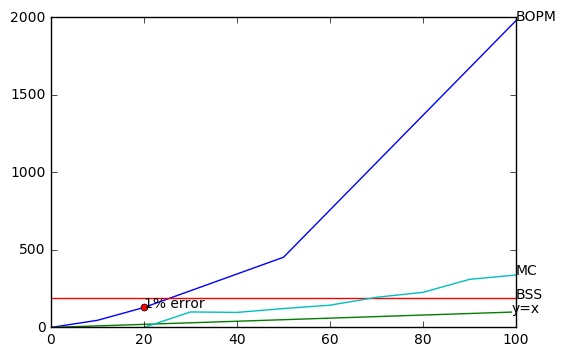

In [5]:
time=[0,46.3,129, 453,1980]
n=[0,10,20,50,100]
x=np.arange(0,100)
y=x
plt.plot(n,time)
plt.text(n[-1], time[-1], 'BOPM')
plt.plot(x,y)
plt.text(x[-1], y[-1], 'y=x')
a=[0,10,20,50,100]
b=[189,189,189,189,189]
plt.plot(a,b)
plt.text(a[-1], b[-1], 'BSS')
c=[20,30,40,50,60,70,80,90,100]
d=[0,100,97,121.9,143.69,194.62,226.59,310.27,338.31]
plt.plot(c,d)
plt.text(c[-1],d[-1], 'MC')
plt.plot(n[2], time[2], marker='o', markersize=5, color="red")
plt.text(n[2],time[2], '1% error')

Initially it seems as though the BOPM outpaces any of the others in time growth. This is not the case when you step out to n=1000000.

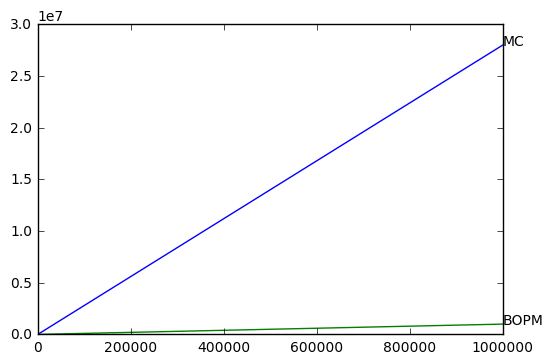

In [6]:
c=[20,30,40,50,60,70,80,90,100,1000000]
d=[0,100,97,121.9,143.69,194.62,226.59,310.27,338.31,28000000]
time=[0,46.3,129, 453,1980,1000000]
n=[0,10,20,50,100,1000000]
plt.plot(c,d)
plt.text(c[-1],d[-1], 'MC')
plt.plot(n,time)
plt.text(n[-1], time[-1], 'BOPM')

The hypothesis that the PDE solution functions well with small variations in the variables, simulating side ways, nontrending markets. Let's first evaluate the PDE and BSS solution at the original price point that we have.

In [25]:
p=PDEsolve(0.3,100,0.05,0.55556,100,17)
b=BSS(0.3,100,0.05,0.5556,100,17)
((p-b[0])/b[0])*100

3.9107426298464878

In the below cells we calculate the value with the volatility and risk free rate changing 0.01. Then we will evaluate the old solution in the context of the new situations.

In [35]:
v=0.31
p2=PDEsolve(v,100,0.05,0.55556,100,20)
b2=b=BSS(v,100,0.05,0.5556,100,20)
error2=((p2-b2[0])/b2[0])*100
error_unchanged=((p-b2[0])/b2[0])*100
v=0.29
p3=PDEsolve(v,100,0.05,0.55556,100,20)
b3=b=BSS(v,100,0.05,0.5556,100,20)
error3=((p3-b3[0])/b3[0])*100
error_unchanged1=((p-b3[0])/b3[0])*100
r=0.04
p4=PDEsolve(0.3,100,r,0.55556,100,20)
b4=b=BSS(0.3,100,r,0.5556,100,20)
error4=((p4-b4[0])/b4[0])*100
error_unchanged2=((p-b4[0])/b4[0])*100
r=0.06
p5=PDEsolve(0.3,100,r,0.55556,100,20)
b5=b=BSS(0.3,100,r,0.5556,100,20)
error5=((p5-b5[0])/b5[0])*100
error_unchanged3=((p-b5[0])/b5[0])*100

print("With volatility plus/minus 0.01, the PDE solution has error ",error_unchanged," and ",error_unchanged1," respectively.\n")
print("With risk free rate plus/minus 0.01, the PDE solution has error ",error_unchanged2," and ",error_unchanged3," respectively.\n")

With volatility plus/minus 0.01, the PDE solution has error  1.05056156943  and  6.93724550127  respectively.

With risk free rate plus/minus 0.01, the PDE solution has error  6.74114144847  and  1.18952791688  respectively.



As you can see, with minor deviations in the volatility and risk free rate, depending on direction, you can get minute changes in error, allowing one to reuse values from a single PDE solution in times of small volatility changes out-of-sample. In fact, the changes in error are minute when compared to the in-sample solution, as seen below. 

In [36]:
print("The errors for the in-sample solution with the plus/minus 0.01 in volatility are ",error2," and ",error3, "respectively.\n")
print("The errors for the in-sample solution with the plus/minus 0.01 in risk free rate are ",error4," and ",error5, "respectively.\n")

The errors for the in-sample solution with the plus/minus 0.01 in volatility are  3.80300444114  and  4.02474585958 respectively.

The errors for the in-sample solution with the plus/minus 0.01 in risk free rate are  4.01745757208  and  3.80814348765 respectively.



Interestingly, the in-sample solution using the PDE solver is higher in two of the four test cases. It can be explained using stability tests of the Partial Differential Equation Method. We have not attempted these, as they are already covered in literature. See the References Section.

# Conclusions

What can be drawn about the use of pricing methods from the study above? As markets get more electronic, computerized and frequentist, firms that prefer to operate at the edge of the envelope must adapt or die with respect to time. 

Different methods named above have different advantages. The Monte Carlo solution has the upper bound in time but also has the least error; MC is preferred by academics because it encapsulates more information via information theory. Black Scholes is used as an industry standard because it was the first to make the jump from stochastics to real life applications. BOPM is simple to understand as it reduces the number of possibilities a price can exist at and with our simplification computes more quickly than any other method. PDE solvers generate a whole list of usable solutions, applicable as long as volatility and asset prices do not shift quickly as is so in sideways markets. 

The code written above is not industry grade code; the functions for all of the methods are written in the somewhat interpreted language of Python rather than the preferred language of HFT firms, C++. Memory at that level of performance can be optimized, the numpy functions can work differently, particularly the norm.cdf function which is the backbone of Black Scholes. 

However, if we hold all these variables constant, we can make the conclusion that for the code written above at the very least, our simplification to the BOPM model originally published in 1979 resulted in computation times quicker than the industry grade model. We absorb a minute amount of error for reducing the computation time in roughly half. Firms operating on the very edge may consider our algorithm as an attractive opportunity to lower the computational time and cost to quickly arrive at the fair price for stock options.

# References

* Cerny, A. "INTRODUCTION TO FAST FOURIER TRANSFORM IN FINANCE." Journal of Derivatives (2004): n. pag. Print.
* Dunbar, Steve R. "Solution of the Black Scholes Equation." Stochastic Processes and Advanced Mathematical Finance. University of Nebraska-Lincoln, Lincoln. Lecture.
* Hackmann, Daniel. "Solving the Black Scholes Equation Using a Finite Difference Method." Thesis. York University, 2009. Print.
* Weitian, Li, and Hong Xi. "Solving Black-Scholes PDE by Crank-Nicolson and Hopscotch Methods." Thesis. Mälardale University, n.d. Print.
* Anon. "Pricing Options Using Monte Carlo Simulations." Pricing Options Using Monte Carlo Simulations | Code and Finance. Nikola, 29 Aug. 2013. Web. 08 May 2017.